I want to show how a Data Scientist would address a technical problem by analyzing the breast cancer datasets from three excel files such as (Death, Recovered, Under Treatment) through conducting some technical activities such as:
* The preparation of the breast cancer for support vector machine algorithm
* Visualization and data exploratory of the dataset to know better the data and feature engineering steps
* Support Vector Machine kernels (Linear, Polynomial, Radial)
* Conducting the Support vector machine hyperparameter tuning
* Conducting the Principal Component Analysis and how to use it to reduce the complexity of a problem
* The goal is to correctly predict if someone weather would have Benign or malignant tumor

My overview of my implementation in this notebook would be described as below:
* Understand the shape of the data
* Data Cleaning
* Data Visualization
* Data Exploration
* Feature Engineering
* Data Preprocessing for Model
* Basic Model Building (SVM)
* Model Tuning Hyperparameters
* PCA Analysis

# Data Understanding:
Before dive into the machine learning processes, let’s describe what the features of the datasets stand for and how some of them are categorized. 

We have three datasets with the same features and target, but for three categories such as 
* The patients who are under treatment
* The patients who are recovered 
* The patients who died 

# The features could be described as bellow:
* patient_id: the id of the patient 
* gender: the gender of the patient which “Female” is 0 and “Male” is 1
* education: the education level of the patient which Illiterate=0, Elementary= 1, Middle School =2 , High School =3 , Diploma = 4, Associate =5 , Bachelor =6 , Master = 7
* treatment_date = the date(year) which the patient would receive the treatment
* id_healthcenter:: is the id for the healthcare center
* id_treatment_region: the region which the patient would receive the treatment
* hereditary_history: the patient has the hereditary history of disease which 1 means “Yes” and 0 means “No”
* birth_date: birth date (year) of the patient
* age: the age of the patient
* weight: the weight of the patient
* thickness_tumor: the thickness of the tumor detected in the patient body
* marital_status: the marital status of the patient includes : 1 means married and 0 means single
* marital_length: the age of the martial status includes 0 means under 10 years, 1 means above 10 years
* pregnency_experience: the patient has the pregnancy experience which 0 means has not experience and 1 means has experience
* giving_birth: the patient has experienced giving the birth. Each number means the number of giving birth
* age_FirstGivingBirth : in which age the patient has the first experience of giving a birth, which before age 30 equals 0 and after age 30 equals 1
* abortion: the patient has experience of abortion which 0 means has not and 1 means has
* blood: the type of bloods A+ =0, A- = 1, AB+ = 2, AB- = 3, B+ = 4, B- = 5, O+ = 6, O- = 7
* taking_heartMedicine: it says if the patient takes the heart medicine or not which 0 means does not and 1 means does
* taking_blood_pressure_medicine: it says if the patient takes the blood pressure or not which 0 means does not and 1 means does
* taking_gallbladder_disease_medicine: it says the patient takes the gallbladder medicine or not which 0 means does not and 1 means does
* smoking: it says if the patient smokes or not which 0 means does not and 1 means does
* alcohol: it says if the patient drinks alcohol or not which 0 means does not and 1 means does
* breast_pain: if the patient has pain in breast part which 0 means has not and 1 means has
* radiation_history: if the patient has experience with radiation in breast area which 0 means has not and 1 means has
* Birth_control(Contraception): the patient takes actions for birth control which 0 means does not and 1 means does 
* menstrual_age: at which age the patient starts natural menstrual which 0 means the patient does not start menstrual, 1 means under age 12, and 2 means above age 12
* menopausal_age: at which age the patient starts natural menopausal which 0 means does not starts, 1 means at under age 50, and 2 means above age 50
* tumor: if the patient has the tumor which 0 means No and 1 means 1
* condition: the condition of the patient which categorized into different categories such as under treatment, recovered, death
* Benign_malignant_tumor: is the target of our model which Benign is 0 and malignant is 1

# Support Vector Machine
A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonliner classification, regression, and even outlier detection. In this notebook, we will discover the support vector machine algorithm as well as it implementation in scikit-learn. We will also discover the Principal Component Analysis and its implementation with scikit-learn. 

# 1. 1. What is Support Vector Machine?
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

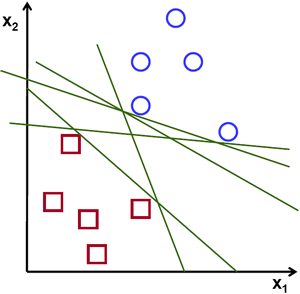

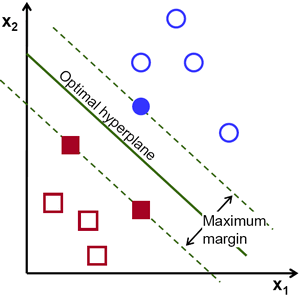

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

# 1. 2. Hyperplanes and Support Vectors


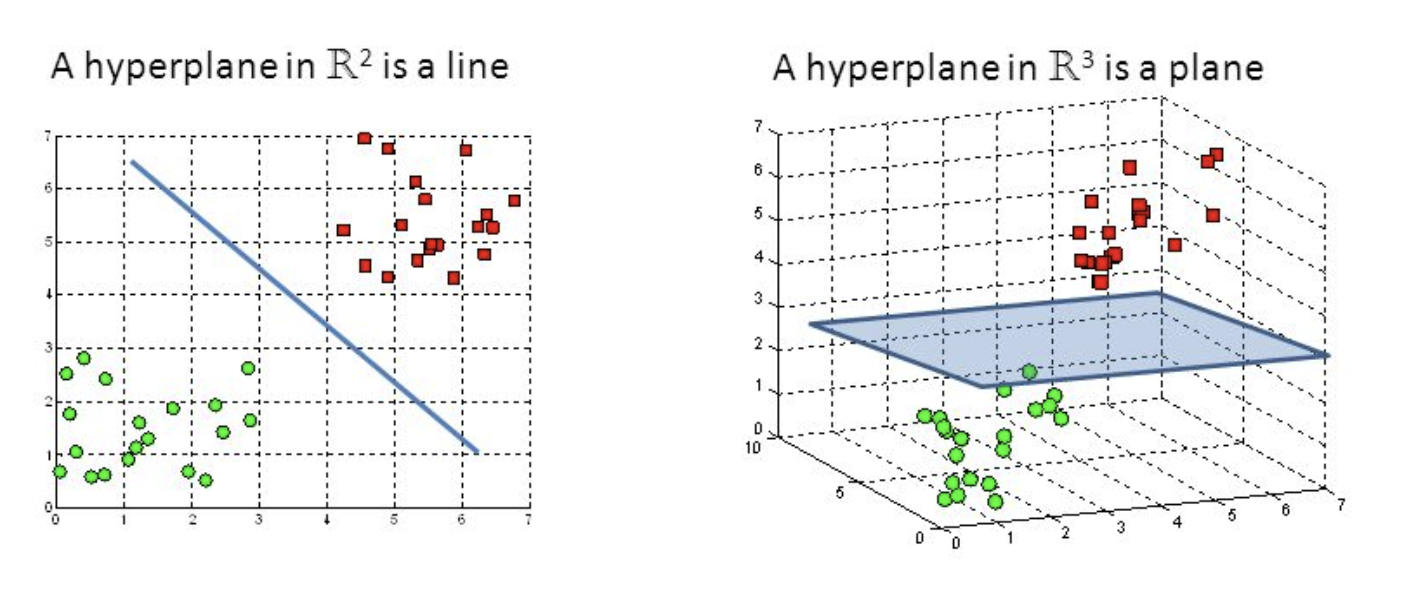

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

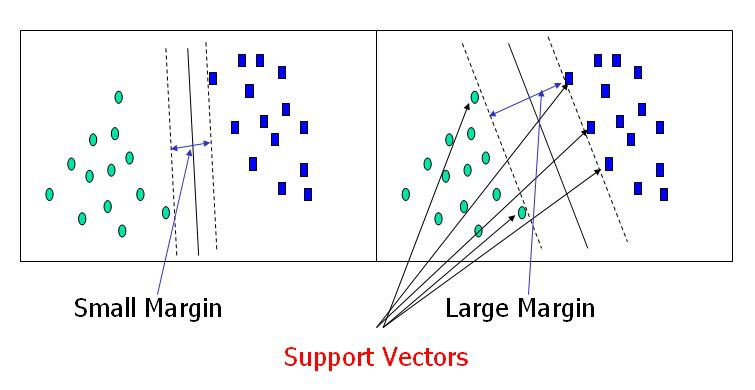

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

# 1. 3. Large Margin Intuition

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. If the squashed value is greater than a threshold value(0.5) we assign it a label 1, else we assign it a label 0. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values([-1,1]) which acts as margin.


# 2. SVM Implementation in Python

We will use support vector machine in Predicting if the cancer diagnosis is benign or malignant based on several observations/features.

In [1]:
#let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#let's import each datasets with the below codes
df_death = pd.read_excel(r"../input/breast-cancer-datasets/death.xlsx")
df_recovered = pd.read_excel(r"../input/breast-cancer-datasets/recovered.xlsx")
df_under_treatment = pd.read_excel(r"../input/breast-cancer-datasets/under treatment.xlsx")

In [3]:
df_death.shape, df_recovered.shape, df_under_treatment.shape

((598, 30), (186, 30), (350, 30))

In [4]:
#let's concat the three different excel files into one file by executing of the below codes

# filenames
excel_names = ["../input/breast-cancer-datasets/death.xlsx", "../input/breast-cancer-datasets/recovered.xlsx", "../input/breast-cancer-datasets/under treatment.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0], header=0,index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
df = pd.concat(frames)

In [5]:
df.shape

(1132, 30)

In [6]:
df.head()

,patient_id,gender,education,treatment_data,id_healthcenter,id_treatment_region,hereditary_history,birth_date,age,weight,...,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer,condition
0,111036008041,0,4,2019,1110000256,1110000329,1,1989,30,69,...,1,0,0,1,1,1,1,0.0,1,death
1,111035996130,0,6,2019,1110000316,1110000331,0,1989,30,71,...,1,0,1,0,0,0,2,0.0,0,death
2,111035971333,0,5,2019,1110000288,1110000330,0,1989,30,74,...,0,0,0,1,1,0,1,0.0,1,death
3,111036018485,0,5,2019,1110000042,1110000329,1,1989,30,75,...,1,1,0,0,0,0,2,0.0,0,death
4,111035985474,0,1,2019,1110000116,1110000330,0,2009,10,70,...,0,0,0,0,0,0,0,0.0,0,death


In [7]:
df["treatment_data"]

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
345    2019
346    2019
347    2019
348    2019
349    2019
Name: treatment_data, Length: 1132, dtype: int64

we do not need some features as long as they just only for indentification such as patient_id, id_healthcenter, id_treatment_region

we also do not need the treatment date because the data gathered in only for 2019

we also do not need the birth data as long as we have the age column


In [8]:
patient_id = df['patient_id']
df= df.drop(df[['patient_id','treatment_data','id_healthcenter','id_treatment_region','birth_date']],axis = True)
df.head()


,gender,education,hereditary_history,age,weight,thickness_tumor,marital_status,marital_length,pregnency_experience,giving_birth,...,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer,condition
0,0,4,1,30,69,0.90,1,0,0,0,...,1,0,0,1,1,1,1,0.0,1,death
1,0,6,0,30,71,0.80,0,0,0,0,...,1,0,1,0,0,0,2,0.0,0,death
2,0,5,0,30,74,0.90,1,0,0,0,...,0,0,0,1,1,0,1,0.0,1,death
3,0,5,1,30,75,0.70,1,1,1,3,...,1,1,0,0,0,0,2,0.0,0,death
4,0,1,0,10,70,0.25,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,death


In [9]:
target = df['\nBenign_malignant_cancer']
target.var

<bound method Series.var of 0      1
1      0
2      1
3      0
4      0
      ..
345    1
346    0
347    1
348    1
349    1
Name: \nBenign_malignant_cancer, Length: 1132, dtype: int64>

In [10]:
df.describe()

,gender,education,hereditary_history,age,weight,thickness_tumor,marital_status,blood,taking_heartMedicine,taking_blood_pressure_medicine,taking_gallbladder_disease_medicine,smoking,alcohol,breast_pain,radiation_history,Birth_control(Contraception),\nmenstrual_age,\nmenopausal_age,\nBenign_malignant_cancer
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1130.000000,1132.000000
mean,0.260601,2.947880,0.577739,34.819788,74.729682,0.564708,0.704947,2.659894,0.628092,0.709364,0.554770,0.357774,0.381625,0.636042,0.500883,0.465548,1.020318,0.115044,0.618375
std,0.439156,1.889036,0.497704,13.774720,19.330146,0.257885,0.456268,2.554803,0.483528,0.454257,0.497211,0.479557,0.486000,0.573547,0.666887,0.499032,0.765372,0.409199,0.491428
min,0.000000,0.000000,0.000000,1.000000,6.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,27.000000,69.000000,0.400000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,33.000000,76.500000,0.600000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,4.000000,1.000000,40.000000,86.000000,0.800000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000
max,1.000000,7.000000,2.000000,86.000000,101.000000,1.300000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,11.000000,1.000000,2.000000,2.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 349
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1132 non-null   int64  
 1   education                            1132 non-null   int64  
 2   hereditary_history                   1132 non-null   int64  
 3   age                                  1132 non-null   int64  
 4   weight                               1132 non-null   int64  
 5   thickness_tumor                      1132 non-null   float64
 6   marital_status                       1132 non-null   int64  
 7   marital_length                       1132 non-null   object 
 8   pregnency_experience                 1132 non-null   object 
 9   giving_birth                         1132 non-null   object 
 10  age_FirstGivingBirth                 1132 non-null   object 
 11  
abortion                      

In [12]:
#let's look at the columns of the datasets
df.columns

Index(['gender ', 'education', 'hereditary_history', 'age', 'weight',
       'thickness_tumor', 'marital_status', 'marital_length',
       'pregnency_experience', 'giving_birth', 'age_FirstGivingBirth  ',
       '\nabortion', 'blood', 'taking_heartMedicine',
       'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine',
       'smoking', 'alcohol', 'breast_pain', 'radiation_history',
       'Birth_control(Contraception)', '\nmenstrual_age', '\nmenopausal_age',
       '\nBenign_malignant_cancer', 'condition'],
      dtype='object')

In [13]:
categorical = len(df.select_dtypes(include = ["object"]).columns)
numerical = len(df.select_dtypes(include=["int", "float64"]).columns)

print('Total Features: ', categorical, 'categorical', '+',
      numerical, 'numerical', '=', categorical+numerical, 'features')

Total Features:  6 categorical + 19 numerical = 25 features


# 2. 1. VISUALIZING THE DATA



In [14]:
# Look at numeric and categorical values separately


df.select_dtypes(include=["int", "float64"]).columns

Index(['gender ', 'education', 'hereditary_history', 'age', 'weight',
       'thickness_tumor', 'marital_status', 'blood', 'taking_heartMedicine',
       'taking_blood_pressure_medicine', 'taking_gallbladder_disease_medicine',
       'smoking', 'alcohol', 'breast_pain', 'radiation_history',
       'Birth_control(Contraception)', '\nmenstrual_age', '\nmenopausal_age',
       '\nBenign_malignant_cancer'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


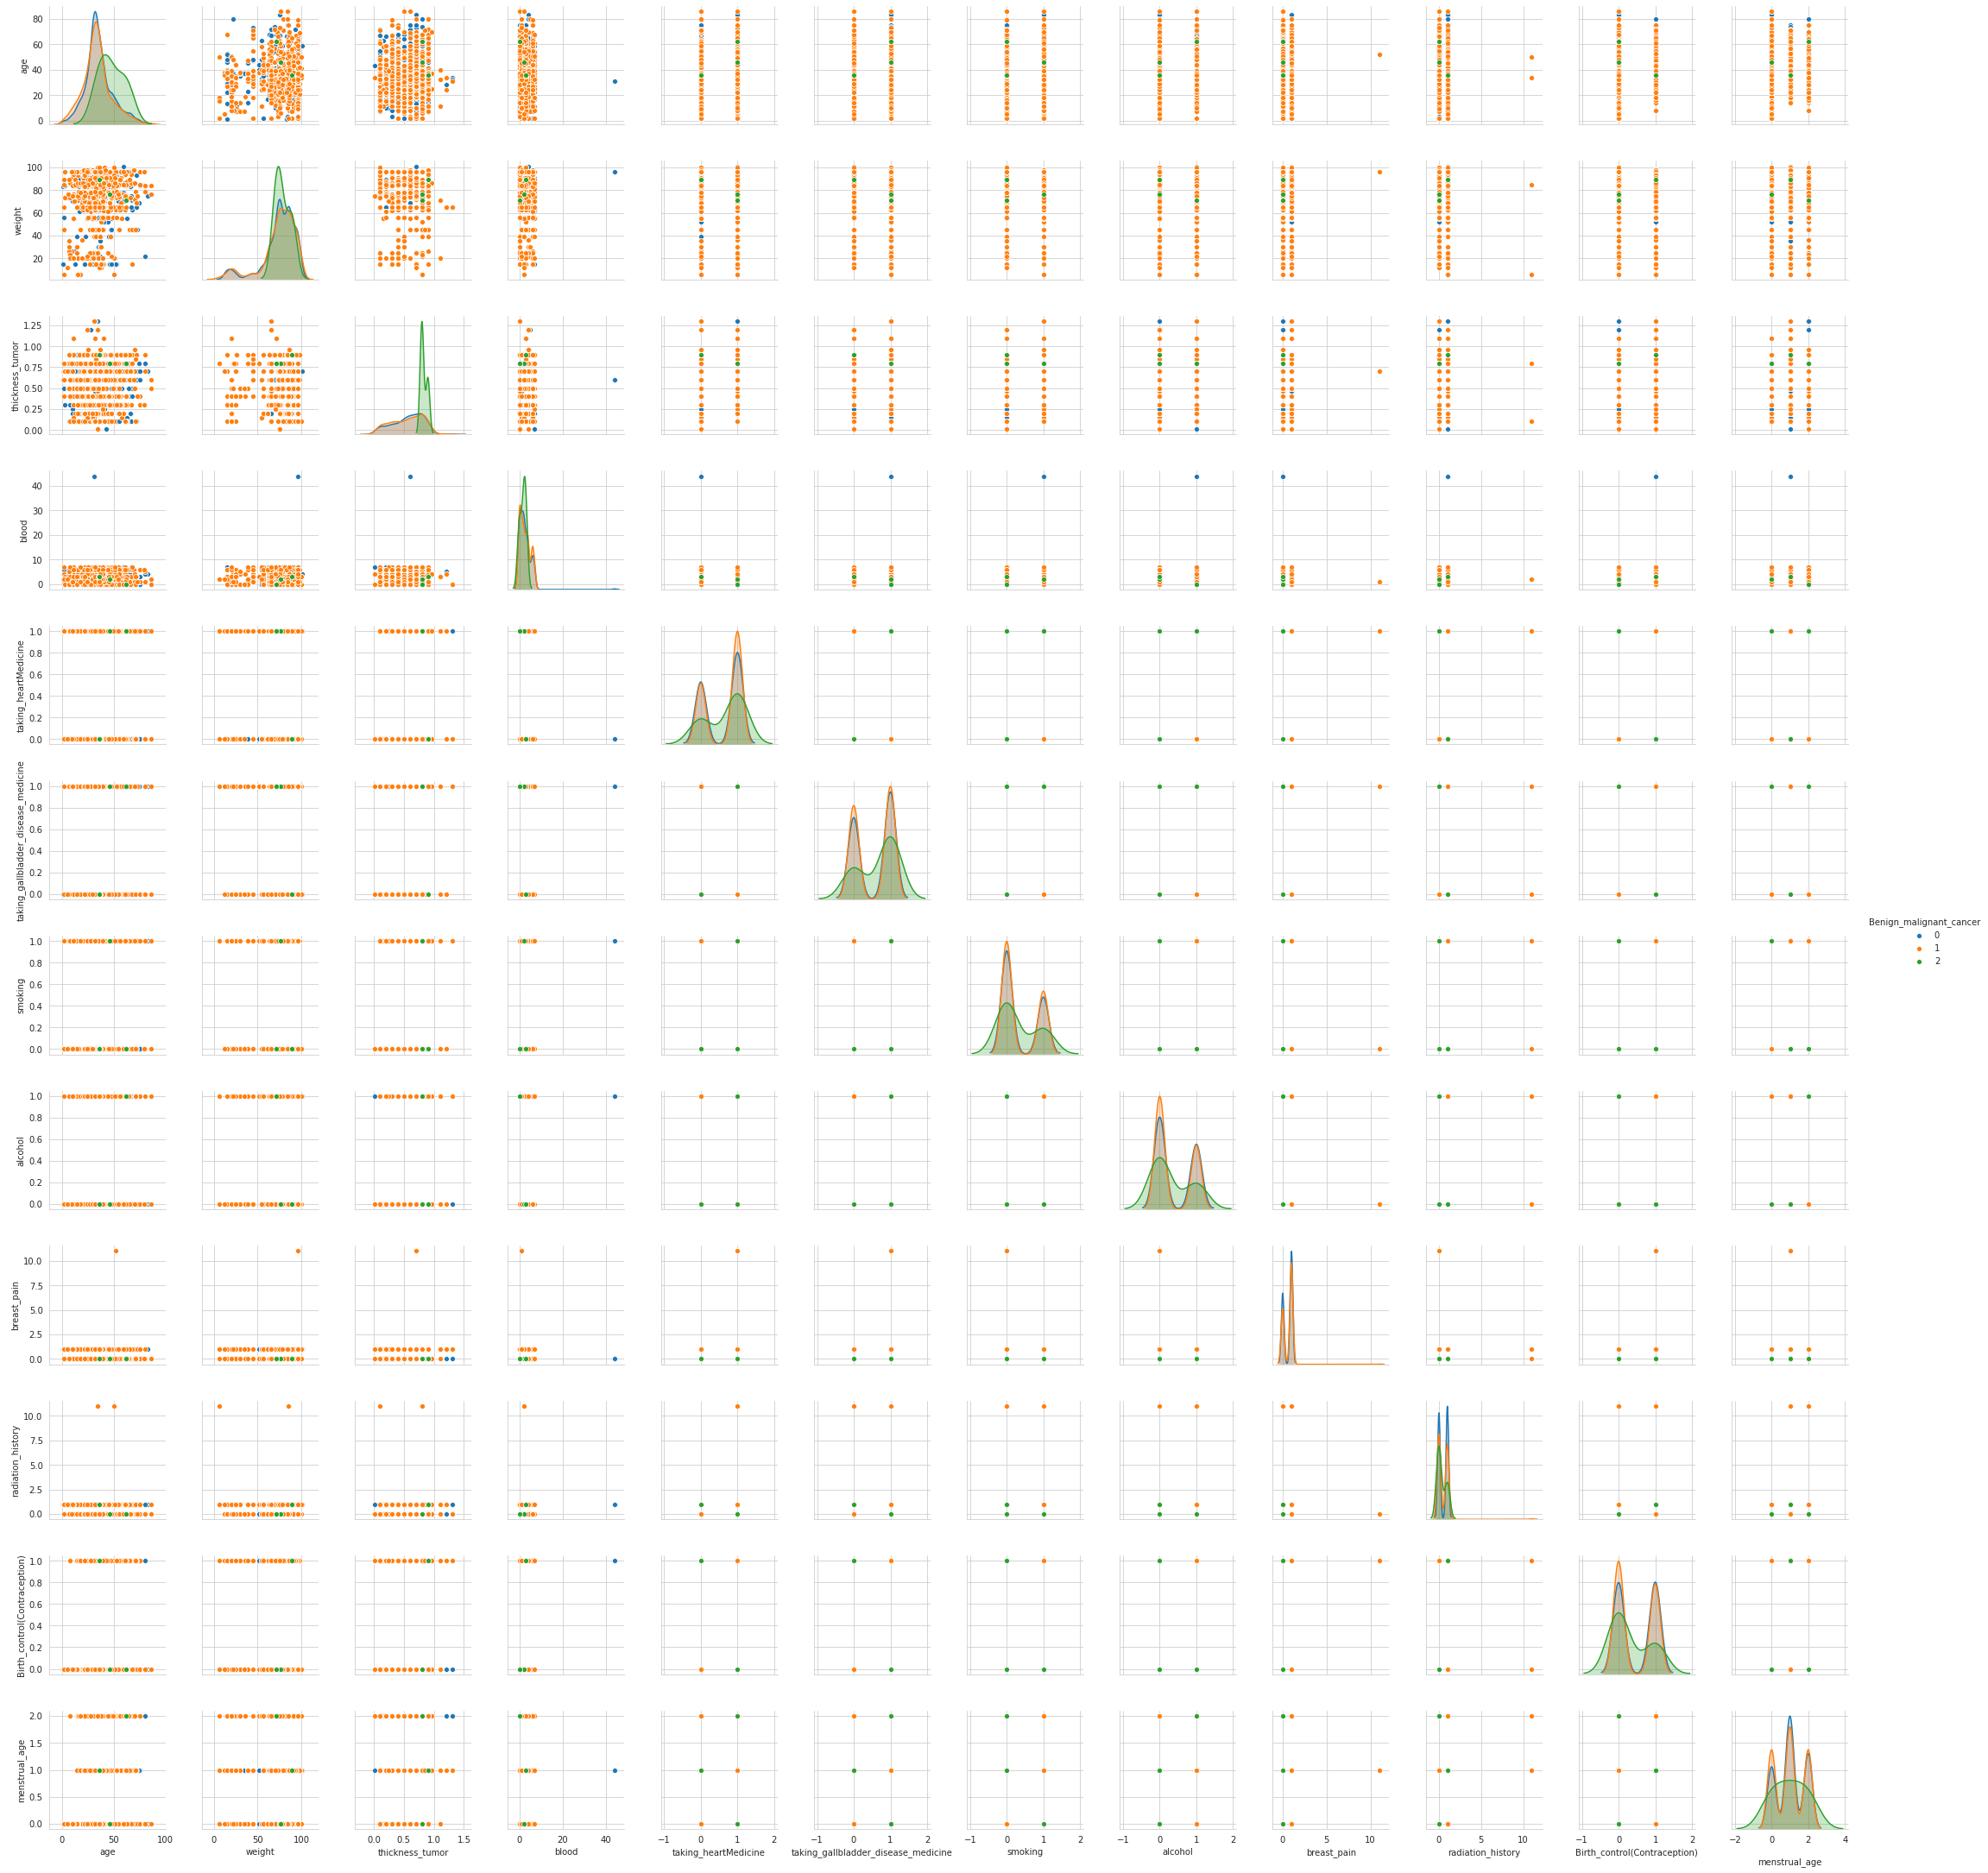

In [15]:
sns.pairplot(df, hue='\nBenign_malignant_cancer', vars=['age','weight', 'thickness_tumor','blood', 'taking_heartMedicine', 'taking_gallbladder_disease_medicine',
                                                        'smoking', 'alcohol','breast_pain','radiation_history', 'Birth_control(Contraception)',
                                                        '\nmenstrual_age'])
plt.show()

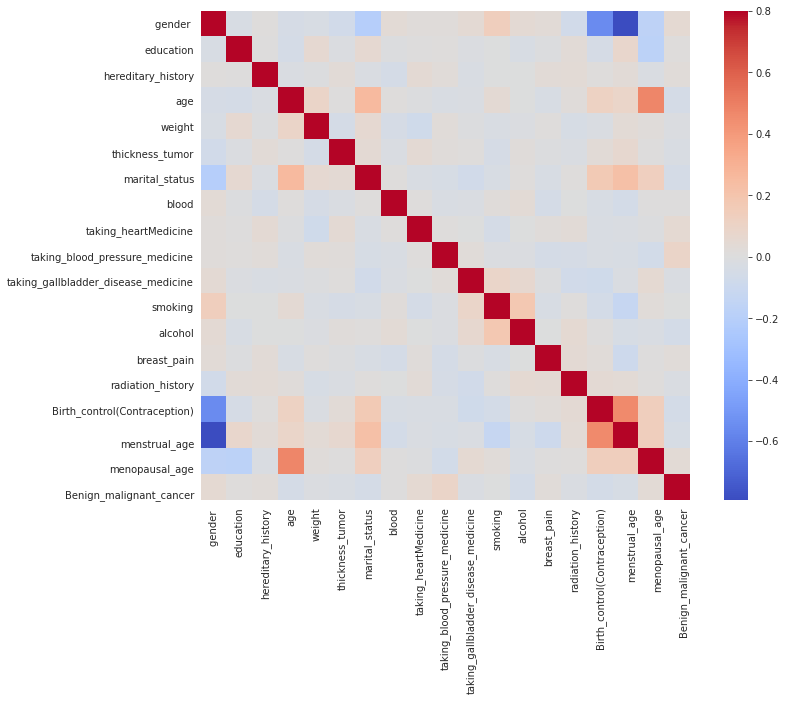

In [16]:
#correlation matrix to find out the most related features to the "'\nBenign_malignant_cancer'" 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="coolwarm", vmax=.8, square=True);

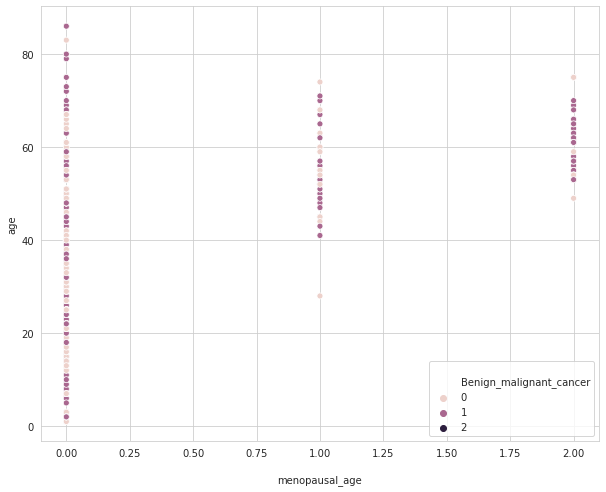

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = '\nmenopausal_age', y = 'age', hue = '\nBenign_malignant_cancer', data = df)

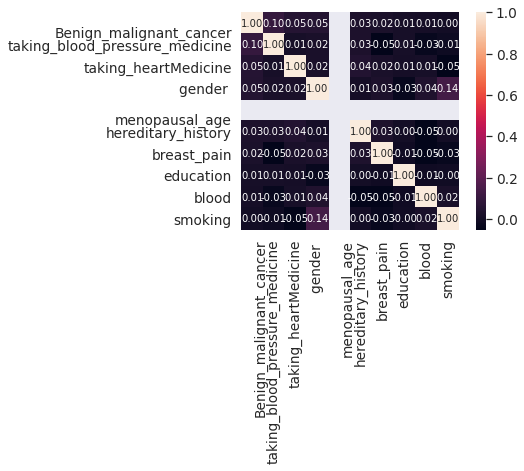

In [18]:
#it is too much features to look at, let's look at the top 10 features related to the Benign_malignant_cancer
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, '\nBenign_malignant_cancer')['\nBenign_malignant_cancer'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

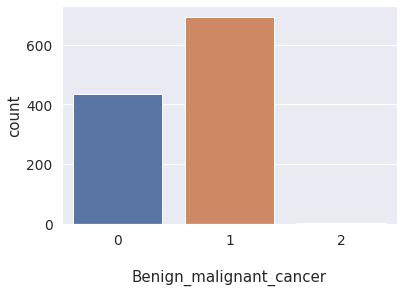

In [19]:
#let's look at the distribution vatiables of the target
sns.countplot(df['\nBenign_malignant_cancer'], label = "Count")

the distribution variables of the target looks fine in case of balancing data

In [20]:
#for checking the categorical variable, we would execute the below code
df.select_dtypes(include = ["object"]).columns


Index(['marital_length', 'pregnency_experience', 'giving_birth',
       'age_FirstGivingBirth  ', '\nabortion', 'condition'],
      dtype='object')

In [21]:
#categorical features of the datasets
df_cat = df[[ 'marital_length', 'pregnency_experience', 'giving_birth',
       'age_FirstGivingBirth  ', '\nabortion', 'condition']]

In [22]:
#numerical variables of the datasets
df_num = df[['gender ', 'education','hereditary_history', 'age',
       'weight', 'thickness_tumor', 'marital_status', 'blood',
       'taking_heartMedicine', 'taking_blood_pressure_medicine',
       'taking_gallbladder_disease_medicine', 'smoking', 'alcohol',
       'breast_pain', 'radiation_history', 'Birth_control(Contraception)',
       '\nmenstrual_age', '\nmenopausal_age', '\nBenign_malignant_cancer']]

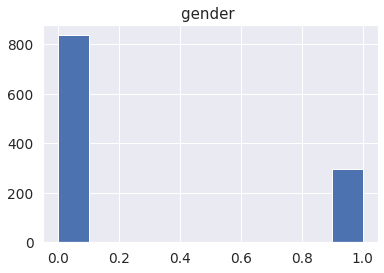

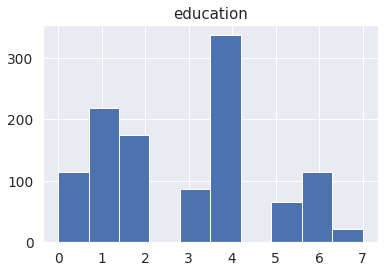

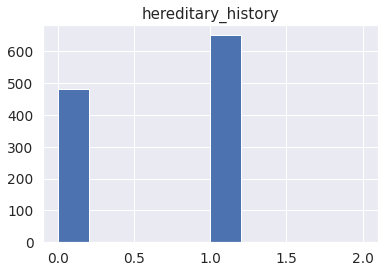

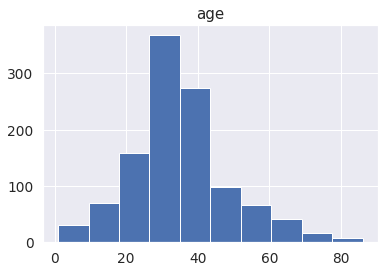

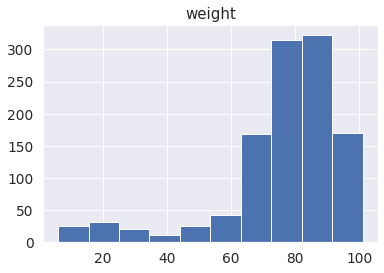

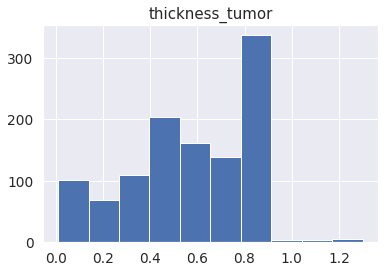

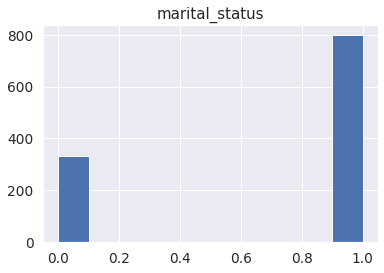

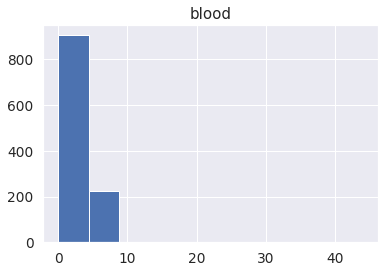

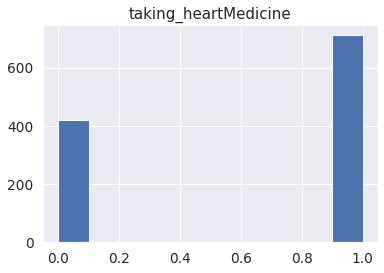

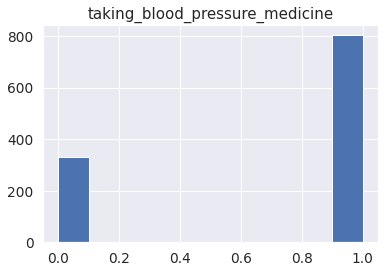

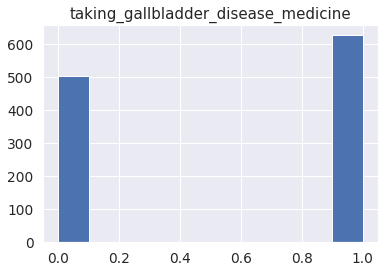

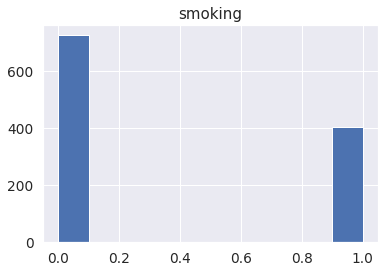

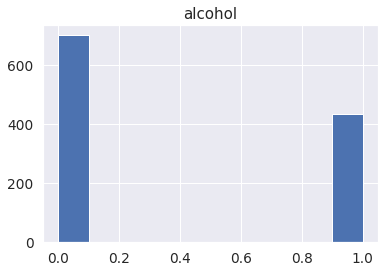

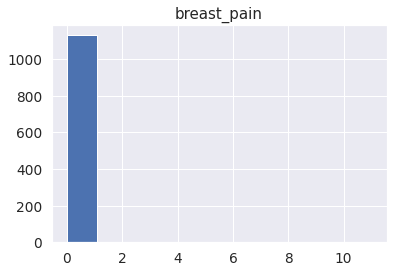

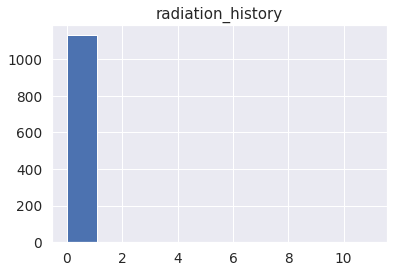

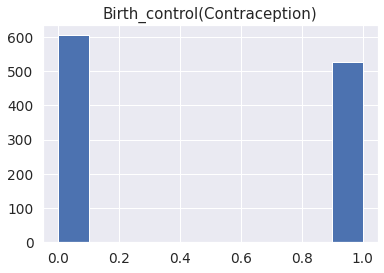

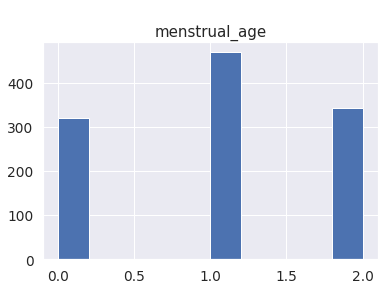

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


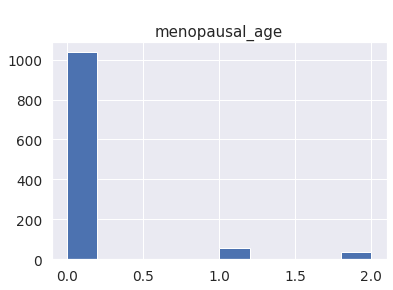

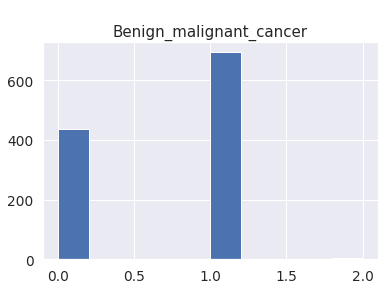

In [23]:
#Distribution for all numeric variables 
#As we can see the Age Distribution is Normal and the others are not

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

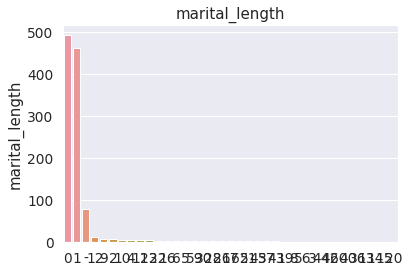

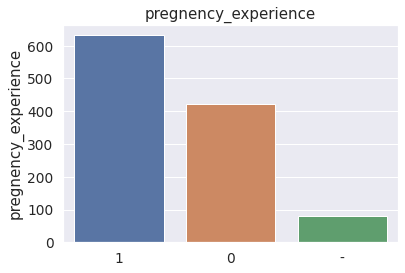

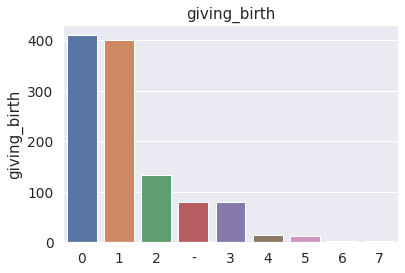

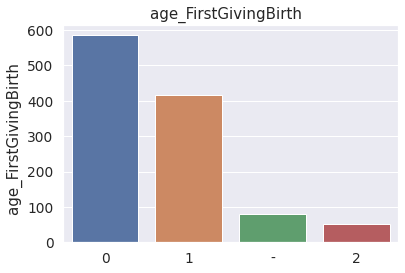

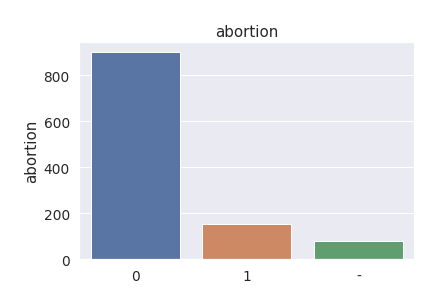

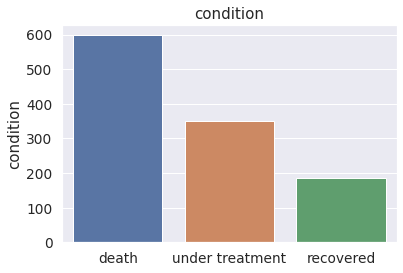

In [24]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

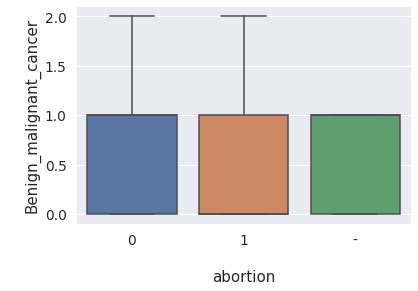

In [25]:
sns.boxplot(x=df['\nabortion'], y=df['\nBenign_malignant_cancer'])

In [26]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,\nBenign_malignant_cancer
1,taking_blood_pressure_medicine
2,taking_heartMedicine
3,gender
4,\nmenopausal_age
5,hereditary_history
6,breast_pain
7,education
8,blood
9,smoking


In [27]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)
train = df.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [28]:
df.isnull().sum()

gender                                 0
education                              0
hereditary_history                     0
age                                    0
weight                                 0
thickness_tumor                        0
marital_status                         0
marital_length                         0
pregnency_experience                   0
giving_birth                           0
age_FirstGivingBirth                   0
\nabortion                             0
blood                                  0
taking_heartMedicine                   0
taking_blood_pressure_medicine         0
taking_gallbladder_disease_medicine    0
smoking                                0
alcohol                                0
breast_pain                            0
radiation_history                      0
Birth_control(Contraception)           0
\nmenstrual_age                        0
\nmenopausal_age                       2
\nBenign_malignant_cancer              0
condition       

In [29]:
df['\nmenopausal_age'] = df['\nmenopausal_age'].fillna(df['\nmenopausal_age'].median())

In [30]:
df.isnull().sum()

gender                                 0
education                              0
hereditary_history                     0
age                                    0
weight                                 0
thickness_tumor                        0
marital_status                         0
marital_length                         0
pregnency_experience                   0
giving_birth                           0
age_FirstGivingBirth                   0
\nabortion                             0
blood                                  0
taking_heartMedicine                   0
taking_blood_pressure_medicine         0
taking_gallbladder_disease_medicine    0
smoking                                0
alcohol                                0
breast_pain                            0
radiation_history                      0
Birth_control(Contraception)           0
\nmenstrual_age                        0
\nmenopausal_age                       0
\nBenign_malignant_cancer              0
condition       

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 349
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1132 non-null   int64  
 1   education                            1132 non-null   int64  
 2   hereditary_history                   1132 non-null   int64  
 3   age                                  1132 non-null   int64  
 4   weight                               1132 non-null   int64  
 5   thickness_tumor                      1132 non-null   float64
 6   marital_status                       1132 non-null   int64  
 7   marital_length                       1132 non-null   object 
 8   pregnency_experience                 1132 non-null   object 
 9   giving_birth                         1132 non-null   object 
 10  age_FirstGivingBirth                 1132 non-null   object 
 11  
abortion                      

In [32]:
pd.get_dummies(df)

,gender,education,hereditary_history,age,weight,thickness_tumor,marital_status,blood,taking_heartMedicine,taking_blood_pressure_medicine,...,age_FirstGivingBirth _0,age_FirstGivingBirth _1,age_FirstGivingBirth _2,age_FirstGivingBirth _-,\nabortion_0,\nabortion_1,\nabortion_-,condition_death,condition_recovered,condition_under treatment
0,0,4,1,30,69,0.90,1,4,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,6,0,30,71,0.80,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
2,0,5,0,30,74,0.90,1,4,1,1,...,1,0,0,0,0,1,0,1,0,0
3,0,5,1,30,75,0.70,1,2,1,1,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,10,70,0.25,0,7,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,1,5,12,0.70,0,2,0,1,...,0,0,0,1,0,0,1,0,0,1
346,1,1,0,13,15,0.70,0,3,1,0,...,0,0,0,1,0,0,1,0,0,1
347,1,7,1,48,75,0.20,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
348,1,5,1,36,65,0.80,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1


In [33]:
df = df.drop(df[['marital_length', 'pregnency_experience', 'giving_birth',
       'age_FirstGivingBirth  ', '\nabortion', 'condition']],axis = True)

In [34]:
y = df['\nBenign_malignant_cancer']
X = df.drop('\nBenign_malignant_cancer', axis=1)


In [35]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler



print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (1132, 18)
'y' shape: (1132,)


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 2. 3. Support Vector Machines (Kernels)

- `C parameter`: Controlls trade-off between classifying training points correctly and having a smooth decision boundary.
    - Small C (loose) makes cost (penalty) of misclassification low (soft margin)
    - Large C (strict) makes cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over it.
- `gamma parameter`: Controlls how far the influence of a single training set reaches.
    - Large gamma: close reach (closer data points have high weight)
    - Small gamma: far reach (more generalized solution)
- `degree parameter` : Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.

A common approach to find the right hyperparameter values is to use grid search. It is often faster to first do a very coarse grid search, then a finer grid search around the best values found. Having a good sence of the what each hyperparameter actually does can also help you search in the right part of the hyperparameter space.

In [37]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 48.48%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.441558    0.715686  0.0  0.484848    0.385748      0.605543
recall       0.760383    0.306080  0.0  0.484848    0.355488      0.484848
f1-score     0.558685    0.428781  0.0  0.484848    0.329156      0.479037
support    313.000000  477.000000  2.0  0.484848  792.000000    792.000000
_______________________________________________
Confusion Matrix: 
 [[238  58  17]
 [299 146  32]
 [  2   0   0]]

Test Result:
Accuracy Score: 44.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.382979    0.704545  0.0  0.447059    0.362508      0.587088
recall       0.737705    0.285714  0.0  0.447059    0.341140      0.447059
f1-score     0.504202    0.406557  0.0  0.447059    0.303586      0.44

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 2. 3. 2. Polynomial Kernel SVM
This code trains a SVM classifier using 2rd degree ploynomial kernel.

In [38]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 68.94%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.654378    0.701571  1.0  0.689394    0.785316      0.683674
recall       0.453674    0.842767  1.0  0.689394    0.765480      0.689394
f1-score     0.535849    0.765714  1.0  0.689394    0.767188      0.675463
support    313.000000  477.000000  2.0  0.689394  792.000000    792.000000
_______________________________________________
Confusion Matrix: 
 [[142 171   0]
 [ 75 402   0]
 [  0   0   2]]

Test Result:
Accuracy Score: 58.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.414141    0.659751  0.0  0.588235    0.357964      0.569680
recall       0.336066    0.732719  0.0  0.588235    0.356261      0.588235
f1-score     0.371041    0.694323  0.0  0.588235    0.355121      0.57

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2. 3. 3. Radial Kernel SVM
Just like the polynomial features method, the similarity features can be useful with any 

In [39]:
model = SVC(kernel='rbf', gamma=0.5, C=0.1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 60.23%
_______________________________________________
CLASSIFICATION REPORT:
               0           1    2  accuracy   macro avg  weighted avg
precision    0.0    0.602273  0.0  0.602273    0.200758      0.362732
recall       0.0    1.000000  0.0  0.602273    0.333333      0.602273
f1-score     0.0    0.751773  0.0  0.602273    0.250591      0.452772
support    313.0  477.000000  2.0  0.602273  792.000000    792.000000
_______________________________________________
Confusion Matrix: 
 [[  0 313   0]
 [  0 477   0]
 [  0   2   0]]

Test Result:
Accuracy Score: 63.82%
_______________________________________________
CLASSIFICATION REPORT:
               0           1    2  accuracy   macro avg  weighted avg
precision    0.0    0.638235  0.0  0.638235    0.212745      0.407344
recall       0.0    1.000000  0.0  0.638235    0.333333      0.638235
f1-score     0.0    0.779174  0.0  0.638235    0.259725      0.497296
support    122.0  217.000000  1.0  0.638

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Other kernels exist but are not used much more rarely. For example, some kernels are specialized for specific data structures. string kernels are sometimes used when classifying text document on DNA sequences.

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear kernel first, especially if the training set is very large or if it has plenty of features. If the training se is not too large, you should try the Gaussian RBF kernel as well. 

## 2. 4. Data Preparation for SVM
This section lists some suggestions for how to best prepare your training data when learning an SVM model.

- **Numerical Inputs:** SVM assumes that your inputs are numeric. If you have categorical inputs you may need to covert them to binary dummy variables (one variable for each category).
- **Binary Classification:** Basic SVM as described in this post is intended for binary (two-class) classification problems. Although, extensions have been developed for regression and multi-class classification.

In [40]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [41]:
print("=======================Linear Kernel SVM==========================")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Polynomial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

print("=======================Radial Kernel SVM==========================")
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

=======================Linear Kernel SVM==========================
Train Result:
Accuracy Score: 60.35%
_______________________________________________
CLASSIFICATION REPORT:
               0           1         2  accuracy   macro avg  weighted avg
precision    0.0    0.603034  1.000000  0.603535    0.534345      0.365716
recall       0.0    1.000000  0.500000  0.603535    0.500000      0.603535
f1-score     0.0    0.752366  0.666667  0.603535    0.473011      0.454813
support    313.0  477.000000  2.000000  0.603535  792.000000    792.000000
_______________________________________________
Confusion Matrix: 
 [[  0 313   0]
 [  0 477   0]
 [  0   1   1]]

Test Result:
Accuracy Score: 63.82%
_______________________________________________
CLASSIFICATION REPORT:
               0           1    2  accuracy   macro avg  weighted avg
precision    0.0    0.638235  0.0  0.638235    0.212745      0.407344
recall       0.0    1.000000  0.0  0.638235    0.333333      0.638235
f1-score     0.0  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 99.87%
_______________________________________________
CLASSIFICATION REPORT:
               0           1         2  accuracy   macro avg  weighted avg
precision    1.0    0.997908  1.000000  0.998737    0.999303      0.998740
recall       1.0    1.000000  0.500000  0.998737    0.833333      0.998737
f1-score     1.0    0.998953  0.666667  0.998737    0.888540      0.998528
support    313.0  477.000000  2.000000  0.998737  792.000000    792.000000
_______________________________________________
Confusion Matrix: 
 [[313   0   0]
 [  0 477   0]
 [  0   1   1]]

Test Result:
Accuracy Score: 63.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.400000    0.638806  0.0  0.635294    0.346269      0.551238
recall       0.016393    0.986175  0.0  0.635294    0.334190      0.635294
f1-score     0.031496    0.775362  0.0  0.635294    0.268953      0.50

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. Support Vector Machine Hyperparameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5, iid=True)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Train Result:
Accuracy Score: 69.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1         2  accuracy   macro avg  \
precision    0.986667    0.664804  1.000000  0.695707    0.883824   
recall       0.236422    0.997904  0.500000  0.695707    0.578108   
f1-score     0.381443    0.797988  0.666667  0.695707    0.615366   
support    313.000000  477.000000  2.000000  0.695707  792.000000   

           weighted avg  
precision      0.792852  
recall         0.695707  
f1-score       0.633037  
support      792.000000  
_______________________________________________
Confusion Matrix: 
 [[ 74 239   0]
 [  1 476   0]
 [  0   1   1]]

Test Result:
Accuracy Score: 62.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1    2  accuracy   macro avg  weighted avg
precision    0.375000    0.638889  0.0  0.626471    0.337963   

[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:  8.9min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. Principal Component Analysis

PCA is:
* Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
* Unsupervised Machine Learning
* A transformation of your data and attempts to find out what features explain the most variance in your data. For example:

In [43]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Text(0, 0.5, 'Second Principal Component')

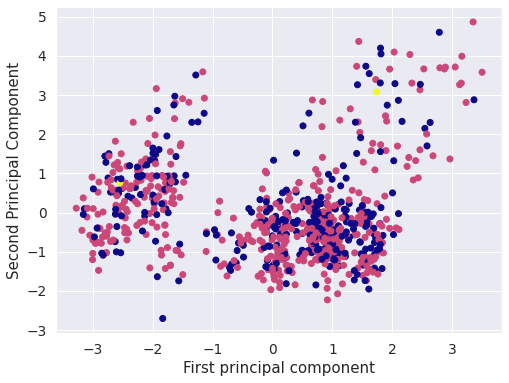

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# 5. Summary

In this notebook you discovered the Support Vector Machine Algorithm for machine learning.  You learned about:
- What is support vector machine?.
- Support vector machine implementation in Python.
- Support Vector Machine kernels (Linear, Polynomial, Radial).
- How to prepare the data for support vector machine algorithm.
- Support vector machine hyperparameter tuning.
- Principal Compenent Analysis and how to use it to reduce the complexity of a problem.
- How to calculate the Principal Component Analysis for reuse on more data in scikit-learn.